In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
print(data.head(5))
print(data.describe())
print("Nº Regiones afectadas ", data['Country/Region'].nunique())
print("Primer registro", min(data['Date']), " a último registro", max(data['Date']), ", un total de", data['Date'].nunique(), " dias")

   Id Province/State Country/Region   Lat  Long        Date  ConfirmedCases  \
0   1            NaN    Afghanistan  33.0  65.0  2020-01-22             0.0   
1   2            NaN    Afghanistan  33.0  65.0  2020-01-23             0.0   
2   3            NaN    Afghanistan  33.0  65.0  2020-01-24             0.0   
3   4            NaN    Afghanistan  33.0  65.0  2020-01-25             0.0   
4   5            NaN    Afghanistan  33.0  65.0  2020-01-26             0.0   

   Fatalities  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
                Id           Lat          Long  ConfirmedCases    Fatalities
count  17040.00000  17040.000000  17040.000000    17040.000000  17040.000000
mean   13190.00000     26.287693      4.766191      285.089613      9.829167
std     7624.68379     22.935124     79.923372     3318.442133    148.005703
min        1.00000    -41.454500   -157.498300        0.000000      0.000000
25%     6595.50000     13.145425    -71.5163

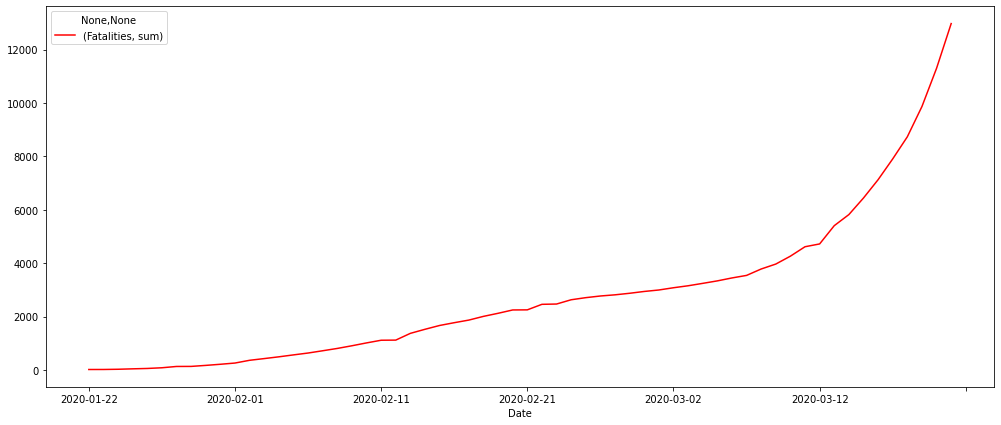

In [4]:
fig, (ax1) = plt.subplots(1, 1, figsize=(17,7))
fatalities_total_date = data.groupby(['Date']).agg({'Fatalities':['sum']})
fatalities_total_date.plot(ax=ax1, color='red')

In [51]:
def cases_days(data, country):
    cases = data[(data['Country/Region']==country) & data['Fatalities']!=0].groupby(['Date']).agg({'Fatalities':['sum']})
    cases['day'] = [x for x in range(len(cases.index))]
    cases.columns = ['confirmed-{}'.format(country), 'day']
    cases['Factor'] = cases['confirmed-{}'.format(country)]/cases['confirmed-{}'.format(country)].shift(1)
    return cases

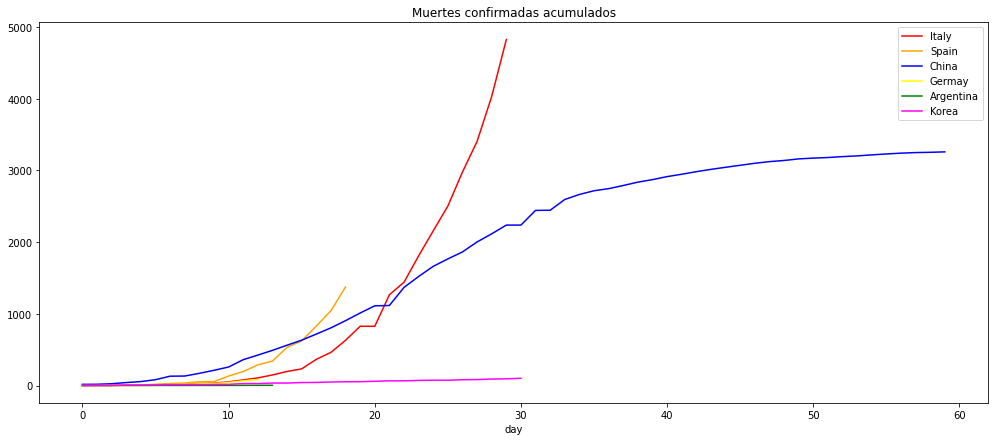

<Figure size 1080x1080 with 0 Axes>

In [52]:


# contamos los dias desde el primer dato
fig, (ax1) = plt.subplots(1, 1, figsize=(17,7))
plt.title("Muertes confirmadas acumulados")

italy_cases = cases_days(data, 'Italy')
spain_cases = cases_days(data, 'Spain')
china_cases = cases_days(data, 'China')
germany_cases = cases_days(data, 'Germany')
argentina_cases = cases_days(data, 'Argentina')
korea_cases = cases_days(data, 'Korea, South')

plt.figure(figsize=(15,15))


italy_cases.set_index('day')['confirmed-Italy'].plot(ax=ax1, color='red')
spain_cases.set_index('day')['confirmed-Spain'].plot(ax=ax1, color='orange')
china_cases.set_index('day')['confirmed-China'].plot(ax=ax1, color='blue')
germany_cases.set_index('day')['confirmed-Germany'].plot(ax=ax1, color='yellow')
argentina_cases.set_index('day')['confirmed-Argentina'].plot(ax=ax1, color='green')
korea_cases.set_index('day')['confirmed-Korea, South'].plot(ax=ax1, color='magenta')


ax1.legend(["Italy", "Spain", "China", "Germay", "Argentina", "Korea"]);

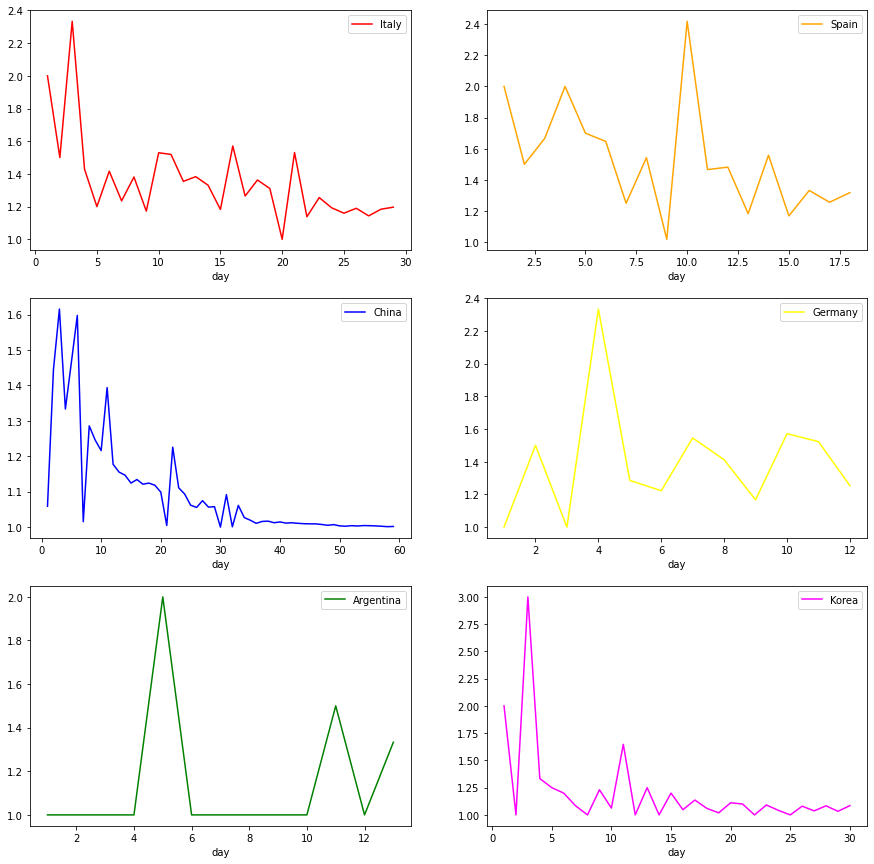

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 2, figsize=(15,15))


italy_cases.set_index('day')['Factor'].plot(ax=ax1[0], color='red')
spain_cases.set_index('day')['Factor'].plot(ax=ax1[1], color='orange')
china_cases.set_index('day')['Factor'].plot(ax=ax2[0], color='blue')
germany_cases.set_index('day')['Factor'].plot(ax=ax2[1], color='yellow')
argentina_cases.set_index('day')['Factor'].plot(ax=ax3[0], color='green')
korea_cases.set_index('day')['Factor'].plot(ax=ax3[1], color='magenta')

ax1[0].legend(["Italy", "day"]);
ax1[1].legend(["Spain", "day"]);
ax2[0].legend(["China", "day"]);
ax2[1].legend(["Germany", "day"]);
ax3[0].legend(["Argentina", "day"]);
ax3[1].legend(["Korea", "day"]);

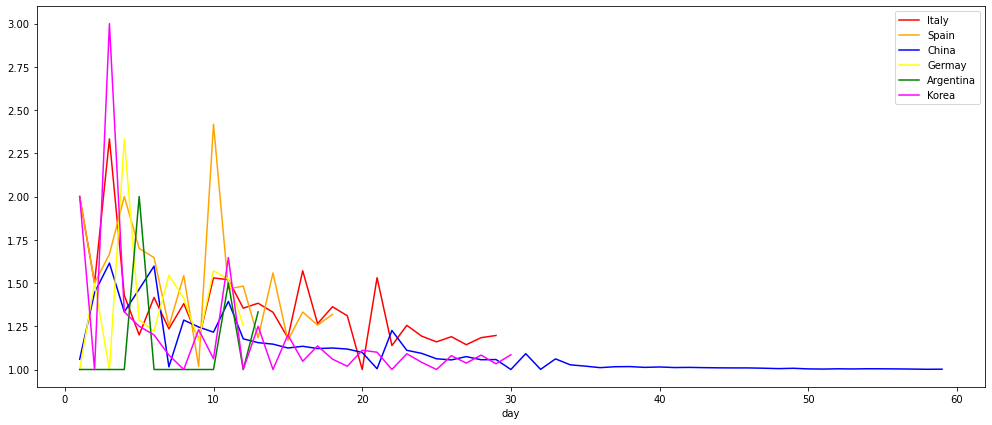

In [10]:
# contamos los dias desde el primer dato
fig, (ax1) = plt.subplots(1, 1, figsize=(17,7))


italy_cases.set_index('day')['Factor'].plot(ax=ax1, color='red')
spain_cases.set_index('day')['Factor'].plot(ax=ax1, color='orange')
china_cases.set_index('day')['Factor'].plot(ax=ax1, color='blue')
germany_cases.set_index('day')['Factor'].plot(ax=ax1, color='yellow')
argentina_cases.set_index('day')['Factor'].plot(ax=ax1, color='green')
korea_cases.set_index('day')['Factor'].plot(ax=ax1, color='magenta')


ax1.legend(["Italy", "Spain", "China", "Germay", "Argentina", "Korea"]);

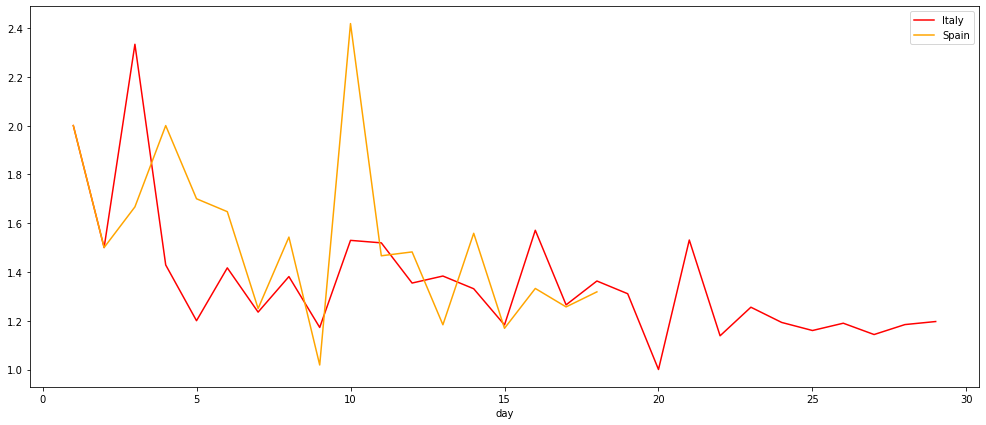

In [11]:
# contamos los dias desde el primer dato
fig, (ax1) = plt.subplots(1, 1, figsize=(17,7))


italy_cases.set_index('day')['Factor'].plot(ax=ax1, color='red')
spain_cases.set_index('day')['Factor'].plot(ax=ax1, color='orange')



ax1.legend(["Italy", "Spain"]);

In [12]:
def sync_last_days(data, ndays):
    last = data[len(data.set_index('day')['Factor'])-ndays:]
    last['lastday'] = [x for x in range(len(last.index))]
    return last.set_index('lastday')

/home/angel/Desktop/git/covid19/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


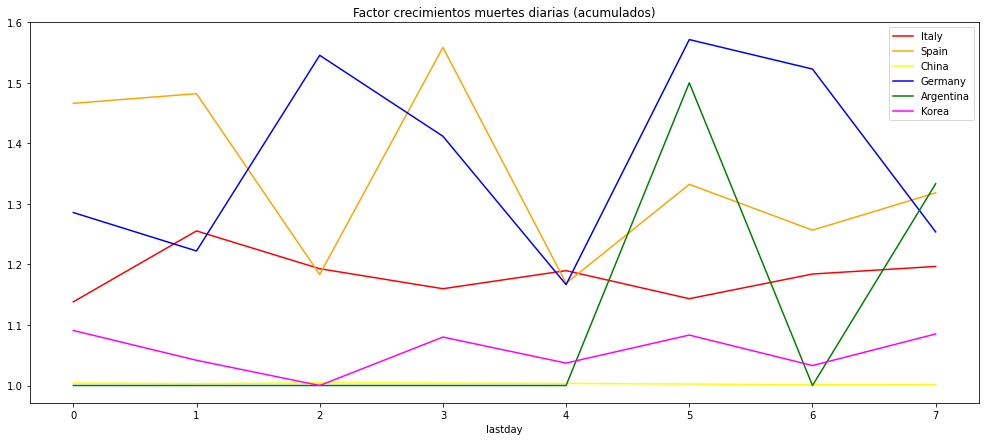

In [63]:
LAST_DAYS = 8
fig, (ax1) = plt.subplots(1, 1, figsize=(17,7))
plt.title("Factor crecimientos muertes diarias (acumulados)")

last7_days_it = sync_last_days(italy_cases, LAST_DAYS)
last7_days_es = sync_last_days(spain_cases, LAST_DAYS)
last7_days_ger  = sync_last_days(germany_cases, LAST_DAYS)
last7_days_china =  sync_last_days(china_cases, LAST_DAYS)
last7_days_arg = sync_last_days(argentina_cases, LAST_DAYS)
last7_days_ko = sync_last_days(korea_cases, LAST_DAYS)

last7_days_it['Factor'].plot(ax=ax1, color='red')
last7_days_es['Factor'].plot(ax=ax1, color='orange')
last7_days_china['Factor'].plot(ax=ax1, color='yellow')
last7_days_ger['Factor'].plot(ax=ax1, color='blue')
last7_days_arg['Factor'].plot(ax=ax1, color='green')
last7_days_ko['Factor'].plot(ax=ax1, color='magenta')



ax1.legend(["Italy", "Spain", "China", "Germany", "Argentina", "Korea"]);


/home/angel/Desktop/git/covid19/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


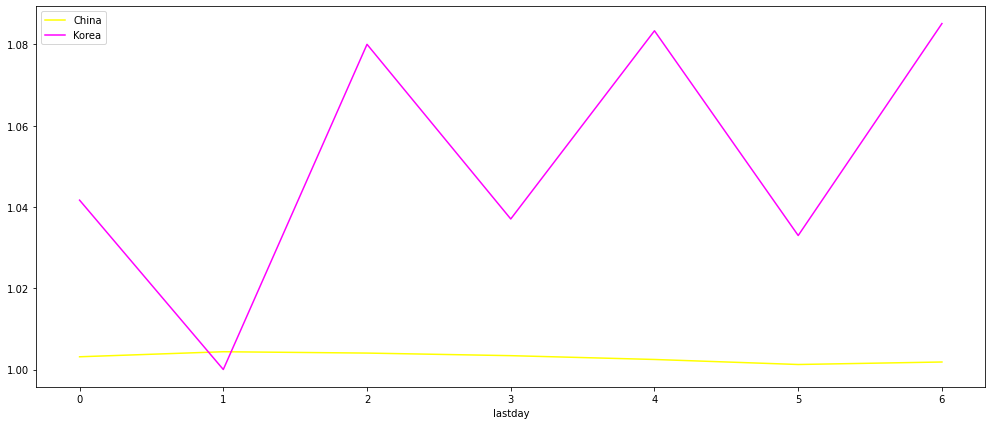

In [14]:
LAST_DAYS = 7
fig, (ax1) = plt.subplots(1, 1, figsize=(17,7))


last7_days_china =  sync_last_days(china_cases, LAST_DAYS)

last7_days_ko = sync_last_days(korea_cases, LAST_DAYS)

last7_days_china['Factor'].plot(ax=ax1, color='yellow')
last7_days_ko['Factor'].plot(ax=ax1, color='magenta')

ax1.legend(["China", "Korea"]);

/home/angel/Desktop/git/covid19/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


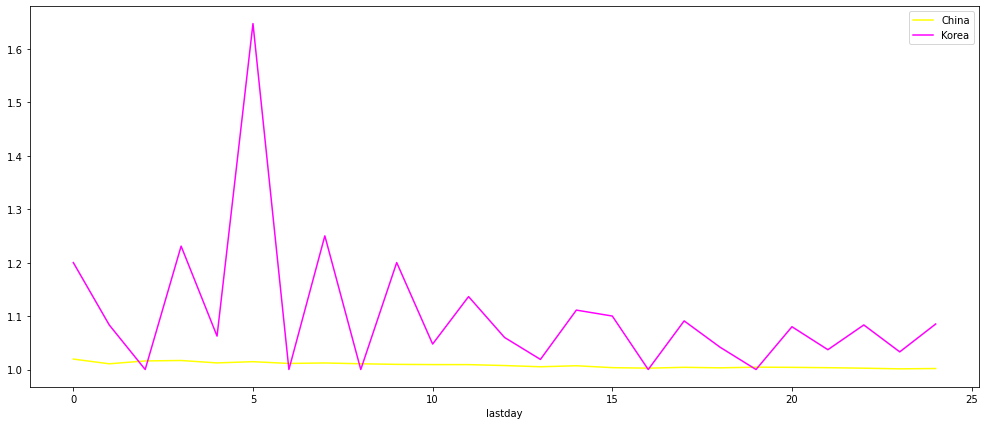

In [15]:
LAST_DAYS = 25
fig, (ax1) = plt.subplots(1, 1, figsize=(17,7))


last7_days_china =  sync_last_days(china_cases, LAST_DAYS)

last7_days_ko = sync_last_days(korea_cases, LAST_DAYS)

last7_days_china['Factor'].plot(ax=ax1, color='yellow')
last7_days_ko['Factor'].plot(ax=ax1, color='magenta')

ax1.legend(["China", "Korea"]);

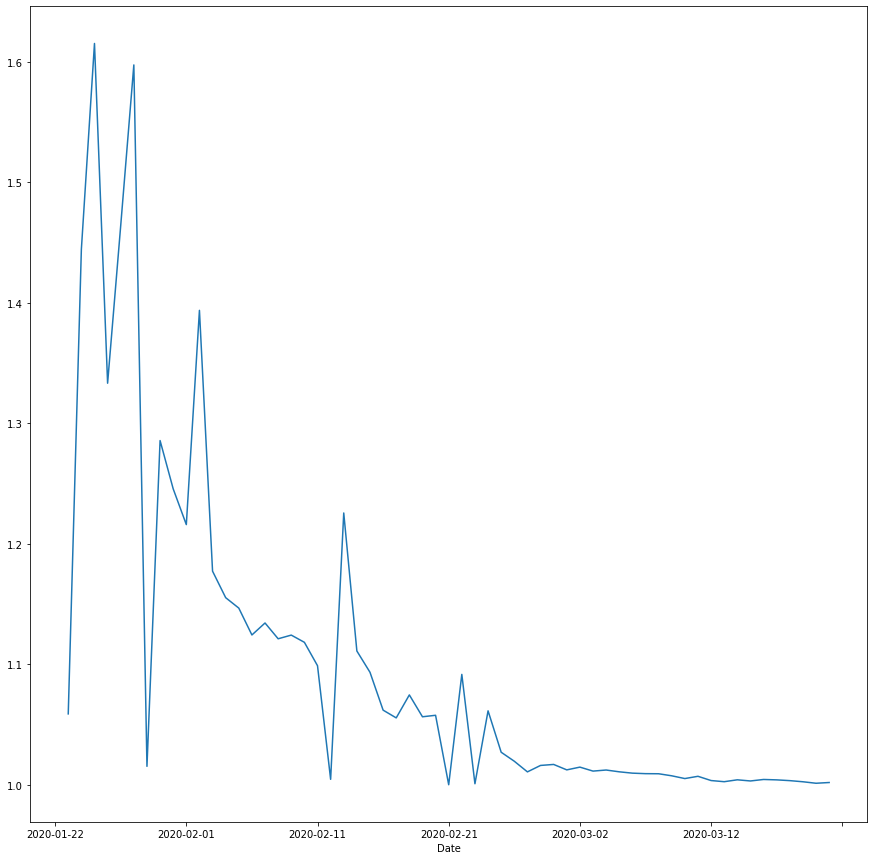

In [58]:

china_cases['Factor'][:].plot(figsize=(15,15))

In [42]:

def sync_last_days(data, ndays):
    data.columns = ['confirmed', 'day', 'Factor']
    last = data[len(data.set_index('day')['confirmed'])-ndays:]
    last['lastday'] = [x for x in range(len(last.index))]
    return last.set_index('lastday')




/home/angel/Desktop/git/covid19/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


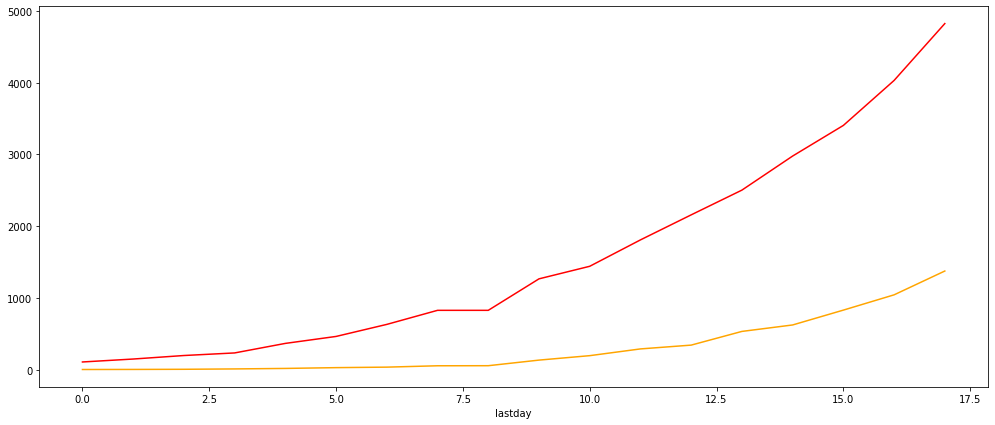

In [46]:
# contamos los dias desde el primer dato
LAST = 18
fig, (ax1) = plt.subplots(1, 1, figsize=(17,7))


spain_deaths = sync_last_days(spain_cases, LAST)
italy_deaths = sync_last_days(italy_cases, LAST)

spain_deaths['confirmed'].plot(ax=ax1, color='orange')
italy_deaths['confirmed'].plot(ax=ax1, color='red')

In [47]:
spain_deaths

,confirmed,day,Factor
lastday,,,
0,2.0,1,2.000000
1,3.0,2,1.500000
2,5.0,3,1.666667
3,10.0,4,2.000000
4,17.0,5,1.700000
5,28.0,6,1.647059
6,35.0,7,1.250000
7,54.0,8,1.542857
8,55.0,9,1.018519


In [49]:
italy_deaths

,confirmed,day,Factor
lastday,,,
0,107.0,12,1.354430
1,148.0,13,1.383178
2,197.0,14,1.331081
3,233.0,15,1.182741
4,366.0,16,1.570815
5,463.0,17,1.265027
6,631.0,18,1.362851
7,827.0,19,1.310618
8,827.0,20,1.000000
